In [1]:
import matplotlib.pyplot as plt # used to make plots
import numpy as np # for creation of arrays
import pandas as pd # for making data frames 

from sklearn import datasets, linear_model # linear regression model package
from sklearn.metrics import mean_squared_error, r2_score # statistics to score model
from sklearn.model_selection import train_test_split # allows model to be tested on unseen data

In [2]:
def linear_regression(x_data, y_data, split, show_data):
    
    '''
    
    linear_regression:
    ------------------
    
    A function that takes in a list of x-data and y-data and uses sklearn package to find the linear relationship
    between the two variables.
    
    Args:
    -----
    
    x_data: list of values for the x-axis
    y-data: list of values for the y-axis
    split: how much training data to use (e.g. 0.8 = 80% for training)
    show_data: boolean to say if information about regression should be printed (gradient, y-intercept, 
    mean square error, root mean square error and coefficient of determination)
    
    Returns:
    --------
    
    x_test: list of test data from the x-axis
    x_train: list of train data from the x-axis
    y_train: list of test data from the y-axis
    y_test: list of train data from the y-axis
    pred_all: list of predicted y-values using the all data from equation y = mx + c
    
    '''
    
    # splits the x- and y-test data randomly according to the specified ratio
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size = split, random_state = 32)

    x_train_format = np.array(x_train) # reformat as numpy arrays as required to reshape later
    x_test_format = np.array(x_test)

    regr = linear_model.LinearRegression() # create linear regression object
    regr.fit(x_train_format.reshape(-1,1), y_train) # train the model using the training sets   
    pred = regr.predict(x_test_format.reshape(-1,1)) # make predictions using the testing set
        
    grad = regr.coef_[0] # gradient of the predicted linear relationship 
    intercept = regr.intercept_ # y-intercept of the predicted linear relationship
    mse = mean_squared_error(y_test, pred) # mean squared error of results
    rmse = np.sqrt(mean_squared_error(y_test, pred)) # root mean squared error 
    co_det = r2_score(y_test, pred) # coefficient of determination 
    mae = sum(abs(y_test-pred)) / len(y_test) # mean absolute error
    
    pred_all = [] # calculates ln(CMC) value assuming linear relationship 
    for x_val in x_data:
        pred_val = (grad * x_val) + intercept
        pred_all.append(pred_val)
    
    if show_data:  # prints data if asked for 
        print("Gradient: ", grad)
        print("Intercept: ", intercept)
        print("Mean squared error: %.2f" % mse)
        print("Root mean squared error: %.2f" % rmse)
        print("Coefficient of determination: %.2f" % co_det)
        print("Mean Absolute Error: %.2f" % mae)
        print("\n")
    
    return(x_test, x_train, y_test, y_train, pred_all)

In [3]:
def linear_reg_stats_average(x_data, y_data, split):
              
    '''
    
    linear_reg_stats_average:
    --------------------------
    
    A function that takes in a list of x-data and y-data and finds the average values of the statistics 
    coefficient of determination, root mean square error and mean absolute error using sklearn to find the 
    linear relationship.
    
    Args:
    -----
    
    x_data: list of values for the x-axis
    y-data: list of values for the y-axis
    split: test/train split
    
    Returns:
    --------
    
    rmse_av: average value of the root mean square error
    co_det_av: average value of the coefficient of determination
    mae_av: average value of the mean absolute error
    
    '''

    indices = np.arange(len(x_data))
    
    rmse_total = 0; co_det_total = 0; mae_total = 0
    count = 0
    
    for rs in range(1000):
        
        # splits the x- and y-test data randomly according to the specified ratio
        x_train, x_test, y_train, y_test, ind_train, ind_test = train_test_split(x_data, y_data, indices, 
                                                                                 train_size = split, 
                                                                                 random_state = rs)

        x_train_format = np.array(x_train) # reformat as numpy arrays as required to reshape later
        x_test_format = np.array(x_test)

        regr = linear_model.LinearRegression() # create linear regression object
        regr.fit(x_train_format.reshape(-1,1), y_train) # train the model using the training sets                                   
        pred = regr.predict(x_test_format.reshape(-1,1))  # make predictions using the testing set
        
        y_test_cmc = ln_cmc_to_cmc(y_test) # converts measured and predicted ln(CMC) back to CMC
        pred_cmc = ln_cmc_to_cmc(pred)
        
        mse = mean_squared_error(y_test_cmc, pred_cmc) # mean squared error of results
        rmse = np.sqrt(mean_squared_error(y_test_cmc, pred_cmc)) # root mean squared error 
        co_det = r2_score(y_test_cmc, pred_cmc) # coefficient of determination 
        mae = sum(abs(y_test_cmc-pred_cmc)) / len(y_test_cmc) # mean absolute error 
        
        rmse_total += rmse # adds up the statistics values
        if 0 < co_det < 1: 
            co_det_total += co_det
        else:
            co_det += 0.0 # consider all less than 0 as no correlation
        mae_total += mae
        count += 1
        
    rmse_av = rmse_total / count # finds the average by dividing by the number of loops
    co_det_av = co_det_total / count
    mae_av = mae_total / count
    
    print("RMSE Mean: ", round(rmse_av, 2))
    print("Coefficient of Determination Mean: ", round(co_det_av, 2))
    print("MAE Mean: ", round(mae_av, 2))
    
    return(rmse_av, co_det_av, mae_av)

In [4]:
def ln_cmc_to_cmc(ln_cmc):
              
    '''
    
    ln_cmc_to_cmc:
    --------------
    
    A function that takes in the predicted ln(CMC) values and converts them to CMC values
    
    Args:
    -----
    
    ln_cmc: list of predicted ln_cmc values
    
    Returns:
    --------
    
    acc_cmc: numpy array of CMC values
    
    '''
          
    cmc_list = []
    
    for val in ln_cmc:
        cmc = np.exp(val) # converts to CMC using the exponential 
        cmc_list.append(cmc)
        
    arr_cmc = np.array(cmc_list)
        
    return(arr_cmc)

In [5]:
def test_train_plotter(x_test, x_train, x_all, y_test, y_train, pred, x_label, save_fig, file_name):
                  
    '''
    
    test_train_plotter:
    ------------------
    
    A function that plots the test and training data as well as the predicted y-values using the test x-data
    
    Args:
    -----
    
    x_test: list of x-values used to test
    x_train: list of x-values used to train
    y_test: list of y-values used to test
    y_train: list of y-values used to train
    pred: predicted data based on results of linear regression
    x_label: label for the x-axis
    save_fig: boolean to say if figure should be saved
    file_name: name to save file as 
    
    Returns:
    --------
    
    plot showing the test and training data and predicted line
    
    '''
      
    plt.scatter(x_test, y_test, color = "green", label = "test") # plots test data
    plt.scatter(x_train, y_train, color = "orange", label = "train") # plots training data     
    plt.plot(x_all, pred, color = "blue", linewidth = 2) # plots predicted line
  
    plt.legend()
    plt.ylabel("ln(CMC / mM)")
    plt.xlabel(x_label)
    
    if save_fig:
        plt.savefig("Plots/" + file_name, dpi = 500, bbox_inches = "tight")

    plt.show()
    
    return

In [6]:
cmc_data = pd.read_csv(open("Submit_Data/output_descriptors.csv"), 
                       delimiter = (","))  
# reads in data about the critical micelle concentration, values are separated by a comma
    
func_group = []; chain_type = []; smiles_str = []; carbon_len = []; ethoxy_len = []
aromatic_ring = []; counter_ion = []; cmc_vals = []; mol_weight = []; val_elec = []; logp_vals = []

for ind, row in cmc_data.iterrows(): # reads in the rows of the data 
    
    func_group_i = row["func_group"] # functional group info 
    chain_i = row["chain"] # chain of molecule (e.g. C8E6)
    smiles_i = row["smiles"] # smiles string
    carbon_len_i = row["carbon_len"] # length of carbon chain
    ethoxy_len_i = row["ethoxy_len"] # length of ethoxy group 
    aromatic_ring_i = row["aromatic_rings"] # number of aromatic rings
    counter_ion_i = row["counter_ion"] # counter ion
    cmc_i = row["CMC"] # CMC values
    mol_weight_i = row["MW"] # molecular weight 
    val_elec_i = row["NVE"] # number of valence electrons
    logp_i = row["logP"] # logP values
    
    func_group.append(func_group_i) # adds the data to separate lists  
    chain_type.append(chain_i); smiles_str.append(smiles_i); carbon_len.append(carbon_len_i)
    ethoxy_len.append(ethoxy_len_i); aromatic_ring.append(aromatic_ring_i); counter_ion.append(counter_ion_i)
    cmc_vals.append(cmc_i); mol_weight.append(mol_weight_i); val_elec.append(val_elec_i); logp_vals.append(logp_i)

***Reads code with with no aromatic rings or E groups in molecule***

In [7]:
func_c = []; smiles_c = []; cLen_c = []; eLen_c = []; ion_c = []; cmc_c = []; ln_cmc_c = []; MW_c = [] 
NVE_c = []; logp_c = []

for ind, length in enumerate(carbon_len):
    if ethoxy_len[ind] == 0 and aromatic_ring[ind] == 0:   
        func_c.append(func_group[ind]); smiles_c.append(smiles_str[ind]); cLen_c.append(carbon_len[ind])
        eLen_c.append(ethoxy_len[ind]); ion_c.append(counter_ion[ind]); cmc_c.append(cmc_vals[ind])
        ln_cmc_c.append(np.log(cmc_vals[ind])); MW_c.append(mol_weight[ind]); NVE_c.append(val_elec[ind])
        logp_c.append(logp_vals[ind])

*Number of carbon atoms in tail*

In [8]:
rmse_av_cLen_c, co_det_av_cLen_c, mae_av_cLen_c = linear_reg_stats_average(cLen_c, ln_cmc_c, 0.7)

RMSE Mean:  33.73
Coefficient of Determination Mean:  0.81
MAE Mean:  14.38


Gradient:  -0.6885169419211434
Intercept:  10.779178906543727
Mean squared error: 0.41
Root mean squared error: 0.64
Coefficient of determination: 0.92
Mean Absolute Error: 0.54




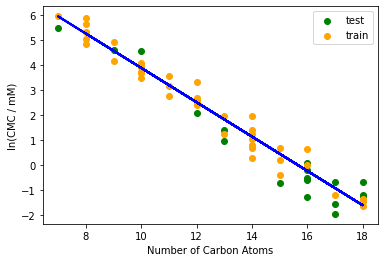

In [9]:
cLen_test_cc, cLen_train_cc, cmc_test_cc, cmc_train_cc, cmc_predall_cc = linear_regression(cLen_c, ln_cmc_c, 
                                                                                           0.7, True)

test_train_plotter(cLen_test_cc, cLen_train_cc, cLen_c, cmc_test_cc, cmc_train_cc, cmc_predall_cc, 
                   "Number of Carbon Atoms", False, "lin_reg_no_ar_no_e.png")

*Molecular weight*

In [10]:
rmse_av_MW_c, co_det_av_MW_c, mae_av_MW_c = linear_reg_stats_average(MW_c, ln_cmc_c, 0.7)

RMSE Mean:  57.89
Coefficient of Determination Mean:  0.45
MAE Mean:  29.29


Gradient:  -0.03653871186840822
Intercept:  10.816259358789194
Mean squared error: 1.32
Root mean squared error: 1.15
Coefficient of determination: 0.73
Mean Absolute Error: 0.96




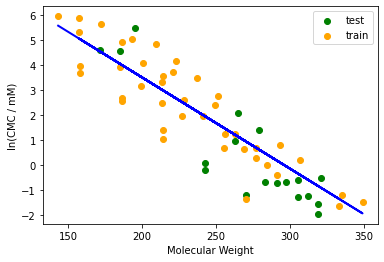

In [11]:
MW_test_cc, MW_train_cc, cmc_test_cc,  cmc_train_cc, cmc_predall_cc = linear_regression(MW_c, ln_cmc_c, 0.7, True)

test_train_plotter(MW_test_cc, MW_train_cc, MW_c, cmc_test_cc, cmc_train_cc, cmc_predall_cc, "Molecular Weight", 
                   False, "lin_reg_mw_no_ar_no_e.png")

*Number of valence electrons*

In [12]:
rmse_av_NVE_c, co_det_av_NVE_c, mae_av_NVE_c = linear_reg_stats_average(NVE_c, ln_cmc_c, 0.7)

RMSE Mean:  50.81
Coefficient of Determination Mean:  0.56
MAE Mean:  25.17


Gradient:  -0.09876579684121191
Intercept:  11.772747013821945
Mean squared error: 0.77
Root mean squared error: 0.88
Coefficient of determination: 0.84
Mean Absolute Error: 0.73




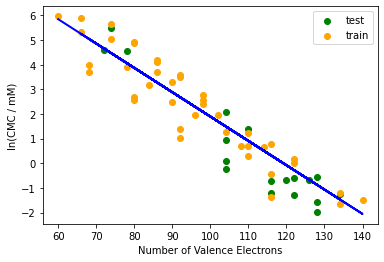

In [13]:
NVE_test_cc, NVE_train_cc, cmc_test_cc,  cmc_train_cc, cmc_predall_cc = linear_regression(NVE_c, ln_cmc_c, 0.7, 
                                                                                          True)

test_train_plotter(NVE_test_cc, NVE_train_cc, NVE_c, cmc_test_cc, cmc_train_cc, cmc_predall_cc, 
                   "Number of Valence Electrons", False, "lin_reg_NVE_no_ar_no_e.png")

*logP*

In [14]:
rmse_av_logp_c, co_det_av_logp_c, mae_av_logp_c = linear_reg_stats_average(logp_c, ln_cmc_c, 0.7)

RMSE Mean:  42.29
Coefficient of Determination Mean:  0.67
MAE Mean:  17.43


Gradient:  -1.480132229901946
Intercept:  7.636113068041672
Mean squared error: 0.92
Root mean squared error: 0.96
Coefficient of determination: 0.81
Mean Absolute Error: 0.84




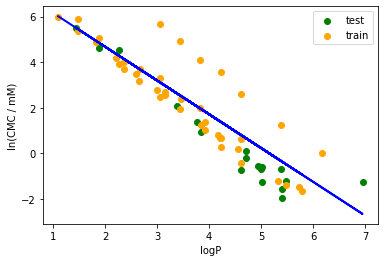

In [15]:
logp_test_cc, logp_train_cc, cmc_test_cc,  cmc_train_cc, cmc_predall_cc = linear_regression(logp_c, ln_cmc_c, 
                                                                                            0.7, True)

test_train_plotter(logp_test_cc, logp_train_cc, logp_c, cmc_test_cc, cmc_train_cc, cmc_predall_cc, "logP", False, 
                   "lin_reg_logp_no_ar_no_e.png")

***Reads code with aromatic rings but no E groups in molecule***

In [16]:
func_p = []; smiles_p = []; cLen_p = []; eLen_p = []; ion_p = []; cmc_p = []; ln_cmc_p = []; MW_p = [] 
NVE_p = []; logp_p = []

for ind, length in enumerate(carbon_len):
    if ethoxy_len[ind] == 0 and aromatic_ring[ind] == 1:  
        func_p.append(func_group[ind]); smiles_p.append(smiles_str[ind]); cLen_p.append(carbon_len[ind])
        eLen_p.append(ethoxy_len[ind]); ion_p.append(counter_ion[ind]); cmc_p.append(cmc_vals[ind])
        ln_cmc_p.append(np.log(cmc_vals[ind])); MW_p.append(mol_weight[ind]); NVE_p.append(val_elec[ind])
        logp_p.append(logp_vals[ind])

*Number of carbon atoms in tail*

In [17]:
rmse_av_cLen_p, co_det_av_cLen_p, mae_av_cLen_p = linear_reg_stats_average(cLen_p, ln_cmc_p, 0.7)

RMSE Mean:  52.01
Coefficient of Determination Mean:  0.06
MAE Mean:  31.28


Gradient:  -0.6064116555791577
Intercept:  8.760143235783357
Mean squared error: 1.23
Root mean squared error: 1.11
Coefficient of determination: 0.78
Mean Absolute Error: 1.04




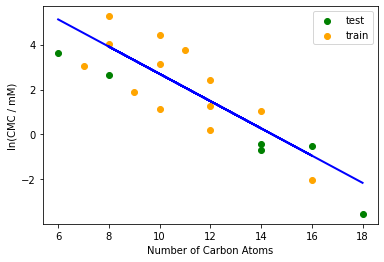

In [18]:
cLen_test_pc, cLen_train_pc, cmc_test_pc, cmc_train_pc, cmc_predall_pc = linear_regression(cLen_p, ln_cmc_p, 0.7, 
                                                                                           True)

test_train_plotter(cLen_test_pc, cLen_train_pc, cLen_p, cmc_test_pc, cmc_train_pc, cmc_predall_pc, 
                   "Number of Carbon Atoms", False, "lin_reg_c_no_e.png")

*Molecular weight*

In [19]:
rmse_av_MW_p, co_det_av_MW_p, mae_av_MW_p = linear_reg_stats_average(MW_p, ln_cmc_p, 0.7)

RMSE Mean:  15.78
Coefficient of Determination Mean:  0.59
MAE Mean:  9.96


Gradient:  -0.02900543992837641
Intercept:  10.533376610317157
Mean squared error: 1.29
Root mean squared error: 1.14
Coefficient of determination: 0.77
Mean Absolute Error: 0.81




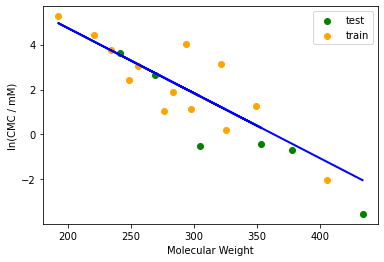

In [20]:
MW_test_pc, MW_train_pc, cmc_test_pc, cmc_train_pc, cmc_predall_pc = linear_regression(MW_p, ln_cmc_p, 0.7, True)

test_train_plotter(MW_test_pc, MW_train_pc, MW_p, cmc_test_pc, cmc_train_pc, cmc_predall_pc, "Molecular Weight",
                   False, "lin_reg_mw_no_e.png")

*Number of valence electrons*

In [21]:
rmse_av_NVE_p, co_det_av_NVE_p, mae_av_NVE_p = linear_reg_stats_average(NVE_p, ln_cmc_p, 0.7)

RMSE Mean:  22.98
Coefficient of Determination Mean:  0.42
MAE Mean:  14.39


Gradient:  -0.0690127649512479
Intercept:  10.13304108211751
Mean squared error: 1.19
Root mean squared error: 1.09
Coefficient of determination: 0.79
Mean Absolute Error: 0.88




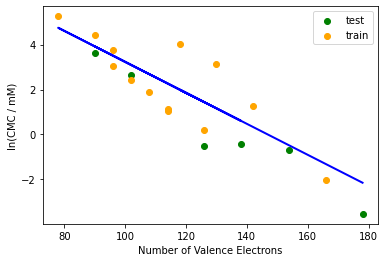

In [22]:
NVE_test_pc, NVE_train_pc, cmc_test_pc, cmc_train_pc, cmc_predall_pc = linear_regression(NVE_p, ln_cmc_p, 0.7, 
                                                                                         True)

test_train_plotter(NVE_test_pc, NVE_train_pc, NVE_p, cmc_test_pc, cmc_train_pc, cmc_predall_pc, 
                   "Number of Valence Electrons", False, "lin_reg_NVE_no_e.png")

*logP*

In [23]:
rmse_av_logp_p, co_det_av_logp_p, mae_av_logp_p = linear_reg_stats_average(logp_p, ln_cmc_p, 0.7)

RMSE Mean:  51.08
Coefficient of Determination Mean:  0.01
MAE Mean:  32.41


Gradient:  -1.0100622882918227
Intercept:  7.035803201598199
Mean squared error: 2.04
Root mean squared error: 1.43
Coefficient of determination: 0.63
Mean Absolute Error: 1.34




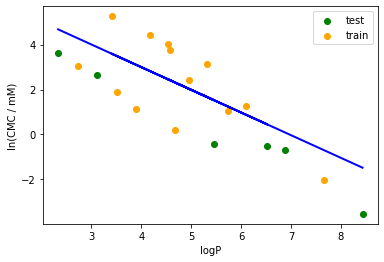

In [24]:
logp_test_pc, logp_train_pc, cmc_test_pc, cmc_train_pc, cmc_predall_pc = linear_regression(logp_p, ln_cmc_p, 0.7, 
                                                                                           True)

test_train_plotter(logp_test_pc, logp_train_pc, logp_p, cmc_test_pc, cmc_train_pc, cmc_predall_pc, "logP", False, 
                   "lin_reg_logp_no_e.png")

***Reads code with E groups but no aromatic rings***

In [25]:
func_e = []; smiles_e = []; cLen_e = []; eLen_e = []; ion_e = []; cmc_e = []; ln_cmc_e = []; MW_e = [] 
NVE_e = []; logp_e = []

for ind, length in enumerate(carbon_len):
    if ethoxy_len[ind] != 0 and aromatic_ring[ind] == 0:    
        func_e.append(func_group[ind]); smiles_e.append(smiles_str[ind]); cLen_e.append(carbon_len[ind])
        eLen_e.append(ethoxy_len[ind]); ion_e.append(counter_ion[ind]); cmc_e.append(cmc_vals[ind])
        ln_cmc_e.append(np.log(cmc_vals[ind])); MW_e.append(mol_weight[ind]); NVE_e.append(val_elec[ind])
        logp_e.append(logp_vals[ind])

*Number of carbon atoms in tail*

In [26]:
rmse_av_cLen_e, co_det_av_cLen_e, mae_av_cLen_e = linear_reg_stats_average(cLen_e, ln_cmc_e, 0.7)

RMSE Mean:  3.23
Coefficient of Determination Mean:  0.78
MAE Mean:  1.44


Gradient:  -1.016936789162159
Intercept:  10.166236773885677
Mean squared error: 0.12
Root mean squared error: 0.35
Coefficient of determination: 0.98
Mean Absolute Error: 0.29




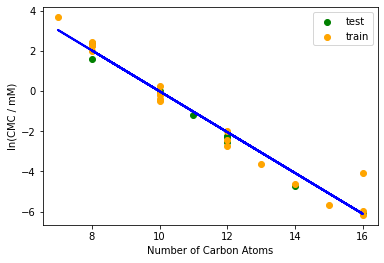

In [27]:
cLen_test_ec, cLen_train_ec, cmc_test_ec, cmc_train_ec, cmc_predall_ec = linear_regression(cLen_e, ln_cmc_e, 0.7, 
                                                                                           True)

test_train_plotter(cLen_test_ec, cLen_train_ec, cLen_e, cmc_test_ec, cmc_train_ec, cmc_predall_ec, 
                   "Number of Carbon Atoms", False, "lin_reg_c_no_ar.png")

*Molecular weight*

In [28]:
rmse_av_MW_e, co_det_av_MW_e, mae_av_MW_e = linear_reg_stats_average(MW_e, ln_cmc_e, 0.7)

RMSE Mean:  9.93
Coefficient of Determination Mean:  0.05
MAE Mean:  4.66


Gradient:  -0.016625591191048433
Intercept:  6.256459618428952
Mean squared error: 2.00
Root mean squared error: 1.41
Coefficient of determination: 0.70
Mean Absolute Error: 1.27




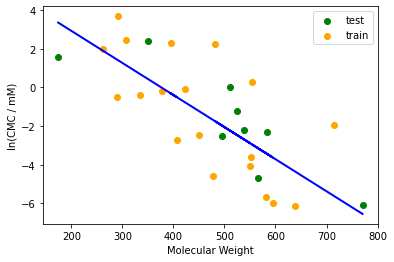

In [29]:
MW_test_ec, MW_train_ec, cmc_test_ec, cmc_train_ec, cmc_predall_ec = linear_regression(MW_e, ln_cmc_e, 0.7, True)

test_train_plotter(MW_test_ec, MW_train_ec, MW_e, cmc_test_ec, cmc_train_ec, cmc_predall_ec, "Molecular Weight", 
                   False, "lin_reg_mw_no_ar.png")

*Number of valence electrons*

In [30]:
rmse_av_NVE_e, co_det_av_NVE_e, mae_av_NVE_e = linear_reg_stats_average(NVE_e, ln_cmc_e, 0.7)

RMSE Mean:  9.98
Coefficient of Determination Mean:  0.05
MAE Mean:  4.68


Gradient:  -0.040626835991321
Intercept:  6.399275543291876
Mean squared error: 1.98
Root mean squared error: 1.41
Coefficient of determination: 0.70
Mean Absolute Error: 1.27




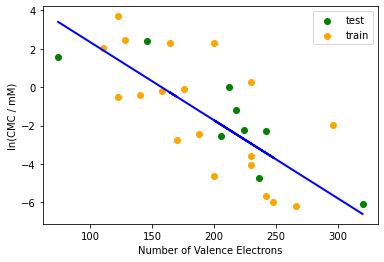

In [31]:
NVE_test_ec, NVE_train_ec, cmc_test_ec, cmc_train_ec, cmc_predall_ec = linear_regression(NVE_e, ln_cmc_e, 0.7, 
                                                                                         True)

test_train_plotter(NVE_test_ec, NVE_train_ec, NVE_e, cmc_test_ec, cmc_train_ec, cmc_predall_ec, 
                   "Number of Valence Electrons", False, "lin_reg_NVE_no_ar.png")

*logP*

In [32]:
rmse_av_logp_e, co_det_av_logp_e, mae_av_logp_e = linear_reg_stats_average(logp_e, ln_cmc_e, 0.7)

RMSE Mean:  3.41
Coefficient of Determination Mean:  0.73
MAE Mean:  1.56


Gradient:  -2.5594876052085174
Intercept:  8.227196093981224
Mean squared error: 0.13
Root mean squared error: 0.37
Coefficient of determination: 0.98
Mean Absolute Error: 0.31




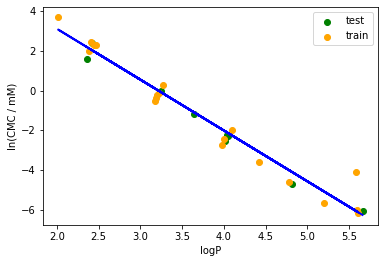

In [33]:
logp_test_ec, logp_train_ec, cmc_test_ec, cmc_train_ec, cmc_predall_ec = linear_regression(logp_e, ln_cmc_e, 0.7, 
                                                                                           True)

test_train_plotter(logp_test_ec, logp_train_ec, logp_e, cmc_test_ec, cmc_train_ec, cmc_predall_ec, "logP", False, 
                   "lin_reg_logp_no_ar.png")

*Length of ethoxylate chain*

Gradient:  -0.6297871502706721
Intercept:  2.669543906142893
Mean squared error: 2.61
Root mean squared error: 1.61
Coefficient of determination: 0.61
Mean Absolute Error: 1.34




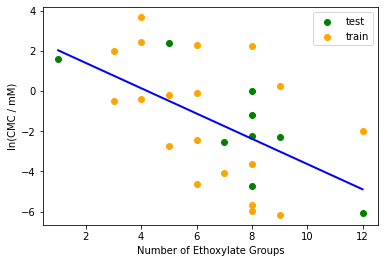

In [34]:
eLen_test_ee, eLen_train_ee, cmc_test_ee, cmc_train_ee, cmc_predall_ee = linear_regression(eLen_e, ln_cmc_e, 0.7, 
                                                                                           True)

test_train_plotter(eLen_test_ee, eLen_train_ee, eLen_e, cmc_test_ee, cmc_train_ee, cmc_predall_ee, 
                   "Number of Ethoxylate Groups", False, "lin_reg_ethoxy_len.png")

***Reads code with E and aromatic rings***

In [35]:
func_ep = []; smiles_ep = []; cLen_ep = []; eLen_ep = []; ion_ep = []; cmc_ep = []; ln_cmc_ep = []; MW_ep = [] 
NVE_ep = []; logp_ep = []

for ind, length in enumerate(carbon_len):
    if ethoxy_len[ind] != 0 and aromatic_ring[ind] == 1:   
        func_ep.append(func_group[ind]); smiles_ep.append(smiles_str[ind]); cLen_ep.append(carbon_len[ind])
        eLen_ep.append(ethoxy_len[ind]); ion_ep.append(counter_ion[ind]); cmc_ep.append(cmc_vals[ind])
        ln_cmc_ep.append(np.log(cmc_vals[ind])); MW_ep.append(mol_weight[ind]); NVE_ep.append(val_elec[ind])
        logp_ep.append(logp_vals[ind])

*Number of carbon atoms in tail*

Gradient:  -0.12805490073610087
Intercept:  -0.6800873571234021
Mean squared error: 0.56
Root mean squared error: 0.75
Coefficient of determination: -3.49
Mean Absolute Error: 0.63




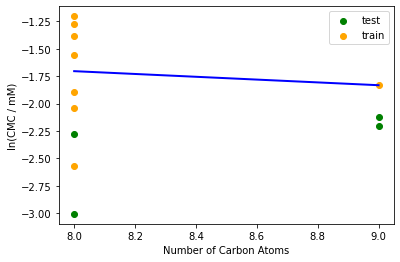

In [36]:
cLen_test_epc, cLen_train_epc, cmc_test_epc, cmc_train_epc, cmc_predall_epc = linear_regression(cLen_ep, 
                                                                                                ln_cmc_ep, 
                                                                                                0.7, True)

test_train_plotter(cLen_test_epc, cLen_train_epc, cLen_ep, cmc_test_epc, cmc_train_epc, cmc_predall_epc, 
                   "Number of Carbon Atoms", False, "lin_reg_c_eph.png")

*Molecular weight*

Gradient:  0.0005620389577653186
Intercept:  -2.026068430660054
Mean squared error: 0.52
Root mean squared error: 0.72
Coefficient of determination: -3.16
Mean Absolute Error: 0.67




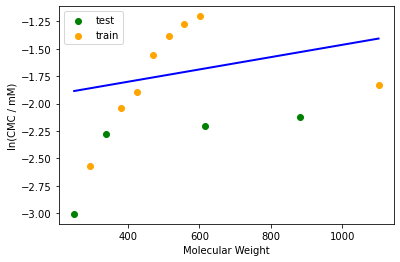

In [37]:
MW_test_epc, MW_train_epc, cmc_test_epc, cmc_train_epc, cmc_predall_epc = linear_regression(MW_ep, ln_cmc_ep, 
                                                                                            0.7, True)

test_train_plotter(MW_test_epc, MW_train_epc, MW_ep, cmc_test_epc, cmc_train_epc, cmc_predall_epc, 
                   "Molecular Weight", False, "lin_reg_mw_eph.png")

*Number of valence electrons*

Gradient:  0.0013718738195378356
Intercept:  -2.0250894135416213
Mean squared error: 0.52
Root mean squared error: 0.72
Coefficient of determination: -3.16
Mean Absolute Error: 0.67




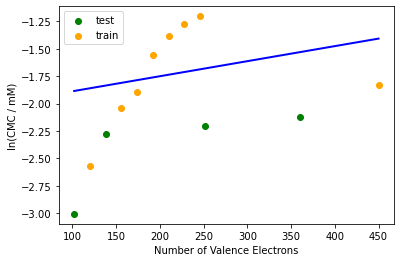

In [38]:
NVE_test_epc, NVE_train_epc, cmc_test_epc, cmc_train_epc, cmc_predall_epc = linear_regression(NVE_ep, ln_cmc_ep, 
                                                                                              0.7, True)

test_train_plotter(NVE_test_epc, NVE_train_epc, NVE_ep, cmc_test_epc, cmc_train_epc, cmc_predall_epc, 
                   "Number of Valence Electrons", False, "lin_reg_NVE_eph.png")

*logP*

Gradient:  0.1319894655621914
Intercept:  -2.2642557796460725
Mean squared error: 0.60
Root mean squared error: 0.77
Coefficient of determination: -3.78
Mean Absolute Error: 0.70




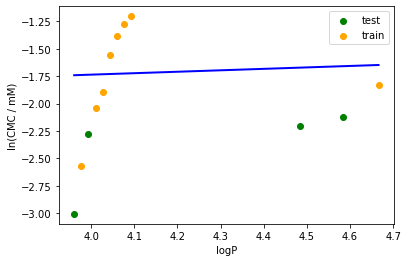

In [39]:
logp_test_epc, logp_train_epc, cmc_test_epc, cmc_train_epc, cmc_predall_epc = linear_regression(logp_ep, 
                                                                                                ln_cmc_ep, 
                                                                                                0.7, True)

test_train_plotter(logp_test_epc, logp_train_epc, logp_ep, cmc_test_epc, cmc_train_epc, cmc_predall_epc, "logP", 
                   False, "lin_reg_logp_eph.png")

*Length of ethoxylate chain*

Gradient:  0.02585381636303822
Intercept:  -1.9176687753723882
Mean squared error: 0.51
Root mean squared error: 0.72
Coefficient of determination: -3.11
Mean Absolute Error: 0.66




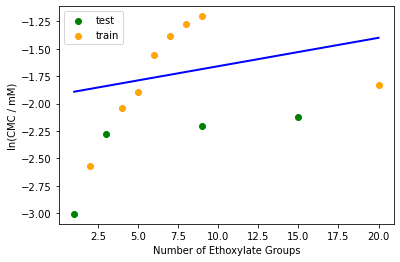

In [40]:
eLen_test_epe, eLen_train_epe, cmc_test_epe, cmc_train_epe, cmc_predall_epe = linear_regression(eLen_ep, 
                                                                                                ln_cmc_ep, 
                                                                                                0.7, True)

test_train_plotter(eLen_test_epe, eLen_train_epe, eLen_ep, cmc_test_epe, cmc_train_epe, cmc_predall_epe, 
                   "Number of Ethoxylate Groups", False, "lin_reg_elen_eph.png")